- model example
    - determint overfitting?
    - address overfitting
- elastic-net
    - regularization: lasso vs ridge
- python workflow for supervised learning with linear models
    - data frames
    - data issues and outliers
    - model specification and setup
    - fitting with cross-validataion, CV parameters
    - choice of loss function
- evaluating the model
    - model outputs and diagnosis: how are these used?
    - which model is best
- feature engineering


# Load data

In [1]:
import pandas as pd
from pathlib import Path
from glob import glob
from pyprojroot import here

In [2]:
p = Path('.')

In [3]:
p

PosixPath('.')

In [4]:
here()

PosixPath('/home/dchen/git/hub/sklearn-crash_course')

In [5]:
here() / "data/Comp_*.csv"

PosixPath('/home/dchen/git/hub/sklearn-crash_course/data/Comp_*.csv')

In [6]:
list(p.glob("../data/Comp_*.csv"))

[PosixPath('../data/Comp_North America.csv'),
 PosixPath('../data/Comp_UK.csv'),
 PosixPath('../data/Comp_AIPAC.csv'),
 PosixPath('../data/Comp_Europe.csv'),
 PosixPath('../data/Comp_Switzerland.csv')]

In [7]:
glob(str(here() / "data/Comp_*.csv"))

['/home/dchen/git/hub/sklearn-crash_course/data/Comp_North America.csv',
 '/home/dchen/git/hub/sklearn-crash_course/data/Comp_UK.csv',
 '/home/dchen/git/hub/sklearn-crash_course/data/Comp_AIPAC.csv',
 '/home/dchen/git/hub/sklearn-crash_course/data/Comp_Europe.csv',
 '/home/dchen/git/hub/sklearn-crash_course/data/Comp_Switzerland.csv']

In [8]:
dfs = [pd.read_csv(x) for x in p.glob("../data/Comp_*.csv")]

In [9]:
df = pd.concat(dfs)

In [10]:
df.columns

Index(['ID', 'SalaryPY', 'SalaryCY', 'BonusPY', 'BonusCY', 'Region', 'Title',
       'Years', 'Reports', 'Review', 'Sector', 'Level', 'Career', 'Office',
       'Floor', 'Retirement'],
      dtype='object')

In [11]:
df.sample(10)

,ID,SalaryPY,SalaryCY,BonusPY,BonusCY,Region,Title,Years,Reports,Review,Sector,Level,Career,Office,Floor,Retirement
21431,86378,388046,430757,320027,342820,UK,VP,13,25,Neutral,Industrials,VP,Senior,Shared,40,Ineligible
22894,92256,88429,91784,26738,25414,UK,Analyst,2,0,Positive,Industrials,Junior,Junior,Cubicle,34,Ineligible
8653,35039,403814,447408,314535,357183,UK,VP,12,28,Neutral,Media,VP,Senior,Shared,32,Ineligible
7806,38256,422438,490061,330129,360899,AIPAC,VP,10,32,Neutral,Media,VP,Senior,Shared,26,Ineligible
1141,4630,66266,66818,21133,14913,UK,Analyst,2,0,Neutral,Tech,Junior,Junior,Cubicle,9,Ineligible
9760,48477,131141,131723,63541,71347,Switzerland,Associate,4,2,Positive,Automotive,Junior,Junior,Cubicle,32,Ineligible
20717,103019,87214,88588,26309,28282,Switzerland,Analyst,2,0,Neutral,Media,Junior,Junior,Cubicle,43,Ineligible
9022,44093,142810,157725,75948,82487,AIPAC,Associate,7,3,Neutral,Industrials,Junior,Junior,Cubicle,36,Ineligible
7782,31578,77881,80250,24184,24748,UK,Analyst,3,0,Neutral,Pharma,Junior,Junior,Cubicle,26,Ineligible
17911,72137,61158,63986,20734,18160,UK,Analyst,2,0,Neutral,Law,Junior,Junior,Cubicle,36,Ineligible


# Visualize response variable

In [12]:
import seaborn as sns

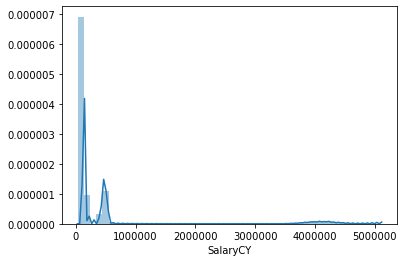

In [13]:
sns.distplot(df["SalaryCY"])

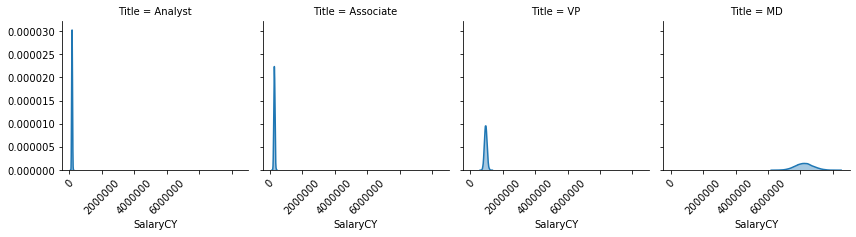

In [14]:
g = sns.FacetGrid(df, col="Title", margin_titles=True)
g.map(sns.distplot, "SalaryCY")
g.set_xticklabels(rotation=45)

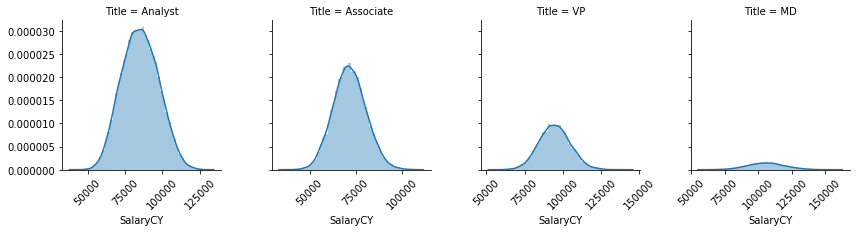

In [15]:
g = sns.FacetGrid(df, col="Title", margin_titles=True, sharex=False)
g.map(sns.distplot, "SalaryCY")
g.set_xticklabels(rotation=45)

# Linear regression with statsmodels

In [16]:
import statsmodels.formula.api as smf

In [17]:
model = smf.ols(formula='SalaryCY ~ Region + Title + Sector + Years + Reports + Level + Career + Floor', data=df)

In [18]:
sm_results = model.fit()

In [19]:
sm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               SalaryCY   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.674e+06
Date:                Wed, 05 Feb 2020   Prob (F-statistic):               0.00
Time:                        10:11:33   Log-Likelihood:            -1.2613e+06
No. Observations:              105030   AIC:                         2.523e+06
Df Residuals:                  105010   BIC:                         2.523e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                6.881e+04   1635.072     42.086      0.000    6.56e+04     7.2e+04
Region[T.Europe]        -4727.9067    475.135     -9.951      0.000   -5659.164   -3796.649
Region[T.North America]  9307.1105    367.597     25.319      0.000    8586.625       1e+04
Region[T.Switzerland]    1.617e+04    386.643     41.829      0.000    1.54e+04    1.69e+04
Region[T.UK]             4706.2918    367.440     12.808      0.000    3986.114    5426.470
Title[T.Associate]       4157.6149    464.958      8.942      0.000    3246.303    5068.927
Title[T.MD]              1.102e+05   4982.000     22.117      0.000       1e+05     1.2e+05
Title[T.VP]             -3.744e+04   1878.279    -19.931      0.000   -4.11e+04   -3.38e+04
Sector[T.Automotive]    -1169.1743    549.648     -2.127      0.033   -2246.476     -91.872
Sector[T.CPG]            -535.5261    547.098     -0.979      0.328   -1607.832     536.780
Sector[T.Industrials]   -1114.1391    549.400     -2.028      0.043   -2190.956     -37.322
Sector[T.Law]            -530.2205    551.050     -0.962      0.336   -1610.271     549.830
Sector[T.Media]          -482.2298    550.315     -0.876      0.381   -1560.840     596.380
Sector[T.Pharma]         -840.9552    549.641     -1.530      0.126   -1918.245     236.334
Sector[T.Real Estate]    -936.1145    549.235     -1.704      0.088   -2012.607     140.378
Sector[T.Retail]         -611.0887    549.904     -1.111      0.266   -1688.893     466.716
Sector[T.Tech]           -836.7139    548.816     -1.525      0.127   -1912.385     238.958
Level[T.Junior]         -3934.1411   1562.849     -2.517      0.012   -6997.304    -870.978
Level[T.VP]             -3.744e+04   1878.279    -19.931      0.000   -4.11e+04   -3.38e+04
Career[T.Senior]         7.275e+04   3148.727     23.104      0.000    6.66e+04    7.89e+04
Years                    7416.6279    110.402     67.178      0.000    7200.241    7633.015
Reports                  1.061e+04     26.985    393.118      0.000    1.06e+04    1.07e+04
Floor                      -3.8764      9.071     -0.427      0.669     -21.656      13.903
==============================================================================
Omnibus:                    33930.361   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8766117.198
Skew:                          -0.126   Prob(JB):                         0.00
Kurtosis:                      47.755   Cond. No.                     2.71e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.06e-27. This might indicate that there are
strong multicollinearity problems or t

In [20]:
sm_results.params

Intercept                   68813.715051
Region[T.Europe]            -4727.906712
Region[T.North America]      9307.110533
Region[T.Switzerland]       16173.004268
Region[T.UK]                 4706.291822
Title[T.Associate]           4157.614902
Title[T.MD]                110184.759326
Title[T.VP]                -37436.903147
Sector[T.Automotive]        -1169.174335
Sector[T.CPG]                -535.526094
Sector[T.Industrials]       -1114.139051
Sector[T.Law]                -530.220485
Sector[T.Media]              -482.229757
Sector[T.Pharma]             -840.955243
Sector[T.Real Estate]        -936.114514
Sector[T.Retail]             -611.088702
Sector[T.Tech]               -836.713901
Level[T.Junior]             -3934.141127
Level[T.VP]                -37436.903147
Career[T.Senior]            72747.856179
Years                        7416.627910
Reports                     10608.422609
Floor                          -3.876364
dtype: float64

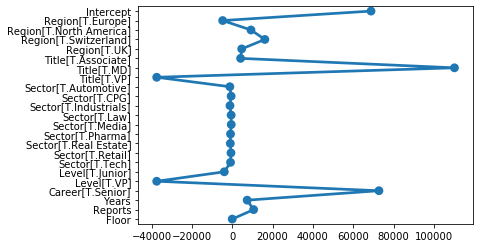

In [21]:
sns.pointplot(x=sm_results.params, y=sm_results.params.index)

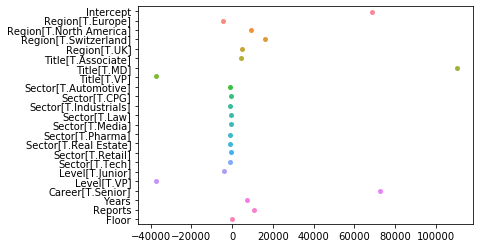

In [22]:
sns.stripplot(x=sm_results.params, y=sm_results.params.index)

In [23]:
coefs = sm_results.params.sort_values(ascending=False)

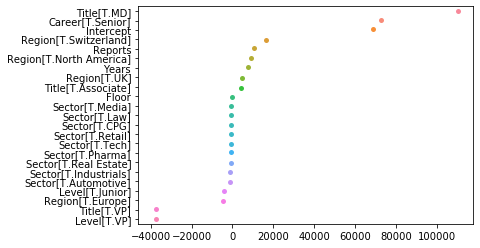

In [24]:
sns.stripplot(x=coefs, y=coefs.index)

# Data prepping

## Drop columns

In [25]:
comp_data = df.drop(columns=["SalaryPY", "BonusPY", "BonusCY", "ID"])

In [26]:
comp_data.columns

Index(['SalaryCY', 'Region', 'Title', 'Years', 'Reports', 'Review', 'Sector',
       'Level', 'Career', 'Office', 'Floor', 'Retirement'],
      dtype='object')

In [27]:
import numpy as np

## Log transform response

In [28]:
comp_data["SalaryCY"] = np.log10(comp_data["SalaryCY"])

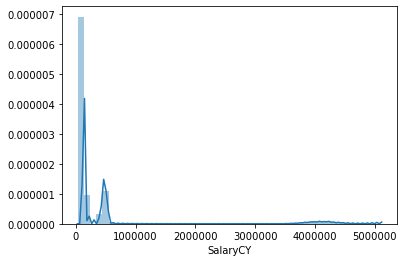

In [29]:
sns.distplot(df["SalaryCY"])

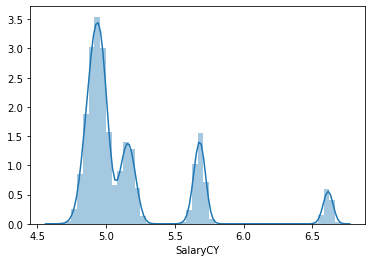

In [30]:
sns.distplot(comp_data["SalaryCY"])

In [31]:
comp_data.sample(10)

,SalaryCY,Region,Title,Years,Reports,Review,Sector,Level,Career,Office,Floor,Retirement
19433,4.991629,Switzerland,Analyst,3,0,Neutral,Media,Junior,Junior,Cubicle,14,Ineligible
6688,4.991155,Switzerland,Analyst,2,0,Negative,Real Estate,Junior,Junior,Cubicle,26,Ineligible
4874,6.616592,Europe,MD,18,351,Negative,Automotive,Executive,Senior,Corner,44,Ineligible
19496,5.661920,Switzerland,VP,11,28,Neutral,Real Estate,VP,Senior,Shared,3,Ineligible
25057,4.826587,UK,Analyst,1,0,Neutral,Real Estate,Junior,Junior,Cubicle,17,Ineligible
2004,4.874418,AIPAC,Analyst,2,0,Neutral,Real Estate,Junior,Junior,Cubicle,46,Ineligible
23185,4.932469,UK,Analyst,2,0,Positive,Industrials,Junior,Junior,Cubicle,15,Ineligible
13814,4.901475,Switzerland,Analyst,2,0,Neutral,CPG,Junior,Junior,Cubicle,36,Ineligible
25676,5.191895,UK,Associate,6,3,Neutral,Retail,Junior,Junior,Cubicle,19,Ineligible
18777,4.980272,UK,Analyst,2,0,Positive,Retail,Junior,Junior,Cubicle,24,Ineligible


## Dummy variable

In [32]:
comp_data_dummy = pd.get_dummies(comp_data, drop_first=True)

In [33]:
comp_data_dummy.sample(10)

,SalaryCY,Years,Reports,Floor,Region_Europe,Region_North America,Region_Switzerland,Region_UK,Title_Associate,Title_MD,...,Sector_Pharma,Sector_Real Estate,Sector_Retail,Sector_Tech,Level_Junior,Level_VP,Career_Senior,Office_Cubicle,Office_Shared,Retirement_Ineligible
11057,4.846690,2,0,14,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
10951,5.648885,9,31,14,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,1,1
1739,5.750805,15,34,41,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1
3811,4.974898,1,0,3,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2282,5.207971,5,5,7,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1
7484,5.114784,4,3,45,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1
21075,4.947914,2,0,17,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
21878,4.947953,2,0,32,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
5814,4.832777,2,0,12,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
5740,5.139211,6,5,12,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1


## Create response vector

In [34]:
y = comp_data_dummy.pop("SalaryCY")

In [35]:
comp_data_dummy.head()

,Years,Reports,Floor,Region_Europe,Region_North America,Region_Switzerland,Region_UK,Title_Associate,Title_MD,Title_VP,...,Sector_Pharma,Sector_Real Estate,Sector_Retail,Sector_Tech,Level_Junior,Level_VP,Career_Senior,Office_Cubicle,Office_Shared,Retirement_Ineligible
0,2,0,12,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
1,5,5,34,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
2,3,0,26,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
3,4,2,21,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
4,15,34,31,0,1,0,0,0,0,1,...,0,0,0,0,0,1,1,0,1,1


In [36]:
y.head()

0    4.954267
1    5.204706
2    4.919925
3    5.148189
4    5.741808
Name: SalaryCY, dtype: float64

In [37]:
comp_data_dummy.columns

Index(['Years', 'Reports', 'Floor', 'Region_Europe', 'Region_North America',
       'Region_Switzerland', 'Region_UK', 'Title_Associate', 'Title_MD',
       'Title_VP', 'Review_Neutral', 'Review_Positive', 'Sector_Automotive',
       'Sector_CPG', 'Sector_Industrials', 'Sector_Law', 'Sector_Media',
       'Sector_Pharma', 'Sector_Real Estate', 'Sector_Retail', 'Sector_Tech',
       'Level_Junior', 'Level_VP', 'Career_Senior', 'Office_Cubicle',
       'Office_Shared', 'Retirement_Ineligible'],
      dtype='object')

In [38]:
len(comp_data_dummy.columns)

27

## Variance threshold

In [39]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
X = selector.fit_transform(comp_data_dummy)

In [40]:
len(comp_data_dummy.columns[selector.get_support(indices=True)])

27

In [41]:
X.shape

(105030, 27)

## Imputation

In [42]:
# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(missing_values=np.nan, strategy='mean') # strategy="most_frequent"

models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

In [43]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [44]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(X)
X = imp.transform(X)

## Normalize

In [45]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X)
X = transformer.transform(X)

## Train test split

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=42
)

# Sklearn linear model

In [48]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [49]:
reg.coef_

array([ 5.44476989e-01,  1.10209198e+00,  5.18673520e-01, -1.45657467e-01,
        4.07616158e-01,  6.34706470e-01,  2.35469792e-01, -1.18129385e+00,
        2.07673940e+02, -5.20915865e+01,  2.92830263e-01,  8.70321811e-01,
        3.38267926e-02,  3.17027679e-02,  3.39353287e-02,  2.84931932e-02,
        3.38347885e-02,  1.65399599e-02,  3.58686079e-02,  2.36609735e-02,
        1.56939424e-02, -7.25320936e-01, -5.20915865e+01,  1.55582354e+02,
       -7.25320936e-01, -5.20915865e+01,  1.84825397e-01])

In [50]:
reg.intercept_

4.408194364826319

In [51]:
coeffs = np.append(reg.intercept_, reg.coef_)
names = np.append('intercept', comp_data_dummy.columns)
results = pd.DataFrame(coeffs, index=names, columns=['coef'])
results

,coef
intercept,4.408194
Years,0.544477
Reports,1.102092
Floor,0.518674
Region_Europe,-0.145657
Region_North America,0.407616
Region_Switzerland,0.634706
Region_UK,0.235470
Title_Associate,-1.181294
Title_MD,207.673940


In [52]:
sm_results.params

Intercept                   68813.715051
Region[T.Europe]            -4727.906712
Region[T.North America]      9307.110533
Region[T.Switzerland]       16173.004268
Region[T.UK]                 4706.291822
Title[T.Associate]           4157.614902
Title[T.MD]                110184.759326
Title[T.VP]                -37436.903147
Sector[T.Automotive]        -1169.174335
Sector[T.CPG]                -535.526094
Sector[T.Industrials]       -1114.139051
Sector[T.Law]                -530.220485
Sector[T.Media]              -482.229757
Sector[T.Pharma]             -840.955243
Sector[T.Real Estate]        -936.114514
Sector[T.Retail]             -611.088702
Sector[T.Tech]               -836.713901
Level[T.Junior]             -3934.141127
Level[T.VP]                -37436.903147
Career[T.Senior]            72747.856179
Years                        7416.627910
Reports                     10608.422609
Floor                          -3.876364
dtype: float64

In [53]:
reg.score(X_train, y_train)

0.9701613788036986

In [54]:
reg.score(X_test, y_test)

0.9700252068833983

In [55]:
import matplotlib.pyplot as plt

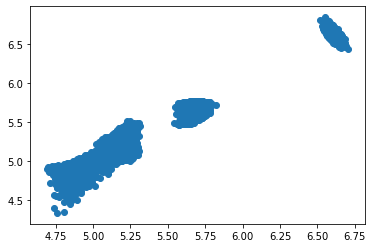

In [56]:
plt.scatter(y_test, reg.predict(X_test))

overfitting: low training set error, high test set error -- variance: how much f-hat is inconsistent over different training sets. high variance models lead to overfitting

underfitting: training set error ~ test set error (both relatively high) -- high bias models lead to underfitting (bias error term that tells you on average when f-hat ~= f)

bias + variance





regression mesaures: https://www.h2o.ai/blog/regression-metrics-guide/
        
        

evaluation done via cross-validation

k-fold cv and hold out

cv error is the mean of the k-fold errors
use the cv error avainst the training set set error

cv error of f-hat > training set oerror fhat -- high variance, -> overfit

high bias if cv error ~ training set orror >> desiered error


 suffers from high bias because RMSE_CV ≈ RMSE_train and both scores are greater than baseline_RMSE.

In [57]:
# from sklearn.metrics import mean_squared_error as MSE
# from sklearn.model_selection import cross_val_score

In [58]:
# MSE_CV = - cross_val_score(scoring = 'neg_mean_squared_error')

In [59]:
# fit model to the full training set

# predict the labels of the training set

# predict labels of test set

In [60]:
# MSE_CV.mean()

In [61]:
# training set MSE(t_train, t_predict_train)

# test MSE(y_test, y_predict_test)